## Question 1:

In [70]:
# STEP 1
import numpy as np
import pandas as pd

In [83]:
# Step 2 & 3
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user")

In [84]:
users.head()

,user_id|age|gender|occupation|zip_code
0,1|24|M|technician|85711
1,2|53|F|other|94043
2,3|23|M|writer|32067
3,4|24|M|technician|43537
4,5|33|F|other|15213


Now we will fetch the each column from df_temp

In [85]:
cols = users.columns.to_list()[0].split("|")

In [86]:
users = users.rename(columns={"user_id|age|gender|occupation|zip_code": "main"})

In [87]:
# Rename the preset column for easier calculations
users[cols[0]] = users["main"].apply(lambda x : x.split("|")[0])

In [88]:
#This allows us to create new columns using the existing data
users.head()

,main,user_id
0,1|24|M|technician|85711,1
1,2|53|F|other|94043,2
2,3|23|M|writer|32067,3
3,4|24|M|technician|43537,4
4,5|33|F|other|15213,5


Similar to previous step, lets complete this activity for each columns

In [89]:
for i in range(1, len(cols)):
    users[cols[i]] = users["main"].apply(lambda x : x.split("|")[i])

In [90]:
users.head()

,main,user_id,age,gender,occupation,zip_code
0,1|24|M|technician|85711,1,24,M,technician,85711
1,2|53|F|other|94043,2,53,F,other,94043
2,3|23|M|writer|32067,3,23,M,writer,32067
3,4|24|M|technician|43537,4,24,M,technician,43537
4,5|33|F|other|15213,5,33,F,other,15213


In [91]:
# Lets drop the main column now
users.drop("main", axis=1, inplace=True)

In [92]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Lets change the Datatypes of few object fields to numerical of the selected columns

In [93]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null object
age           943 non-null object
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: object(5)
memory usage: 37.0+ KB


In [97]:
users["age"] = users["age"].astype('int64')
users["user_id"] = users["user_id"].astype('int64')
# users["zip_code"] = users["zip_code"].astype('int64')

In [131]:
# STEP 4
age = users.groupby("occupation")["age"]
age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [128]:
# STEP 5
gender = users.groupby("occupation")["gender"].value_counts(normalize=True)
male_ratio = pd.DataFrame(gender)
male_ratio.columns = ["ratio"]
male_ratio = male_ratio.reset_index()
male_ratio = male_ratio[male_ratio["gender"]=="M"]

In [130]:
male_ratio.sort_values(by="ratio", ascending=False)

,occupation,gender,ratio
4,doctor,M,1.000000
7,engineer,M,0.970149
37,technician,M,0.962963
29,retired,M,0.928571
27,programmer,M,0.909091
11,executive,M,0.906250
33,scientist,M,0.903226
9,entertainment,M,0.888889
17,lawyer,M,0.833333
31,salesman,M,0.750000


In [132]:
# STEP 6
age.agg(["min", "max"])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [133]:
# STEP 7
users.groupby(["occupation","gender"])["age"].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [139]:
# STEP 8
round(users.groupby("occupation")["gender"].value_counts(normalize=True)*100,2)

occupation     gender
administrator  M          54.43
               F          45.57
artist         M          53.57
               F          46.43
doctor         M         100.00
educator       M          72.63
               F          27.37
engineer       M          97.01
               F           2.99
entertainment  M          88.89
               F          11.11
executive      M          90.62
               F           9.38
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         M          83.33
               F          16.67
librarian      F          56.86
               M          43.14
marketing      M          61.54
               F          38.46
none           M          55.56
               F          44.44
other          M          65.71
               F          34.29
programmer     M          90.91
               F           9.09
retired        M          92.86
               F  

------------

## Question 2

In [140]:
# STEP 1
import numpy as np
import pandas as pd

In [141]:
# STEP 2 & 3
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

In [142]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [143]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [145]:
# STEP 4
df_goal = euro12[["Team", "Goals"]]
df_goal.head()

,Team,Goals
0,Croatia,4
1,Czech Republic,4
2,Denmark,4
3,England,5
4,France,3


In [146]:
# STEP 5
euro12["Team"].count()

16

In [148]:
# STEP 6
euro12.shape[1]

35

In [149]:
# STEP 7
discipline = euro12[["Team", 'Yellow Cards', 'Red Cards']]

In [151]:
# STEP 8
discipline.sort_values(["Red Cards", "Yellow Cards"], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [155]:
# STEP 9 - NOT SURE About This
euro12.groupby("Team")["Yellow Cards"].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [156]:
# STEP 10
euro12[euro12["Goals"] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [161]:
# STEP 11
euro12[euro12["Team"].str.match(r'^G') == True]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [162]:
# STEP 12
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [163]:
# STEP 13
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [182]:
# STEP 14
euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


--------------------------------

## Question 3

In [14]:
# STEP 1 
import numpy as np
import pandas as pd

In [15]:
# STEP 2 Create 3 series 
series1 = pd.Series(np.random.randint(1,5, 100))
series2 = pd.Series(np.random.randint(1,4, 100))
series3 = pd.Series(np.random.randint(10000,30001, 100))

In [16]:
# STEP 3 Data frame creation
df_series = pd.concat([series1, series2, series3], axis=1)
df_series.head()

,0,1,2
0,4,1,25314
1,3,2,25887
2,3,3,23770
3,4,3,23342
4,4,2,16866


In [17]:
# STEP 4 Name change for columns
df_series.columns = [ "bedrs","bathrs","price_sqr_meter"]
df_series.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,25314
1,3,2,25887
2,3,3,23770
3,4,3,23342
4,4,2,16866


In [70]:
# STEP 5 : BigColumn
df_big = df_series['bedrs'].append(df_series['bathrs'].append(df_series['price_sqr_meter']))
df_big

0         4
1         3
2         3
3         4
4         4
      ...  
95    27331
96    14530
97    13214
98    19392
99    25042
Length: 300, dtype: int32

In [200]:
# STEP 6
# Yes, the index is from 0 to 99 - 100 rows
df_series.tail()

,bedrs,bathrs,price_sqr_meter
95,3,3,29288
96,4,1,15172
97,3,3,25908
98,2,2,14379
99,2,1,22455


In [210]:
# STEP 7 Re-index
df_series = pd.concat([series1, series2, series3], axis=0, ignore_index=True)
print(df_series.head())
print(df_series.tail())

0    2
1    2
2    2
3    4
4    2
dtype: int32
295    29288
296    15172
297    25908
298    14379
299    22455
dtype: int32


------------------

## Question 4

In [44]:
# STEP 1
import pandas as pd
import numpy as np

In [45]:
# STEP 2
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


In [47]:
# STEP 3
def get_month_or_day(val):
    if val < 10:
        return(str(0)+str(val))
    else:
        return(str(val))

data["date"] = data[["Yr", "Mo", "Dy"]].apply(lambda x: str(x["Yr"])+"-"+get_month_or_day(x["Mo"])+"-"+get_month_or_day(x["Dy"]), axis=1 )
data["date"] = pd.to_datetime(data["date"], format="%y-%m-%d")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [48]:
data["date"].dtypes

dtype('<M8[ns]')

In [49]:
# STEP 4 
data["date"] = data[["Yr", "Mo", "Dy"]].apply(lambda x: "19"+str(x["Yr"])+"-"+get_month_or_day(x["Mo"])+"-"+get_month_or_day(x["Dy"]), axis=1 )
data["date"] = pd.to_datetime(data["date"])
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [50]:
data.drop(["Yr", "Mo", "Dy"], axis=1, inplace=True)

In [51]:
# STEP 5
data.set_index("date", inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [52]:
# Step 6
# Column Wise
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [53]:
# Row Wise
data[data.isnull().any(axis=1)]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN
1961-03-12,NaN,13.88,16.38,10.25,14.92,13.67,17.12,13.70,16.29,15.79,20.50,22.54


In [54]:
# STEP 7
print(data.info())
print()
print(data.notnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB
None

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


In [55]:
# STEP 8
data.mean(axis=1).mean(axis=0)

10.228284167350386

In [56]:
# STEP 9
loc_stats = pd.DataFrame()
loc_stats["min"] = data.min(axis=0)
loc_stats["max"] = data.max(axis=0)
loc_stats["mean"] = data.mean(axis=0)
loc_stats["std"] = data.std(axis=0)
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


In [57]:
# STEP 10
day_stats = pd.DataFrame()
day_stats["min"] = data.min(axis=1)
day_stats["max"] = data.max(axis=1)
day_stats["mean"] = data.mean(axis=1)
day_stats["std"] = data.std(axis=1)
day_stats.head()

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [58]:
# STEP 11
data = data.reset_index() 
Jan_data = data[data['date'].dt.month == 1]
Jan_data = Jan_data.mean(axis = 0)
Jan_data



RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [61]:
# Step 12  Yearly frequency 
data.groupby(data['date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [62]:
# Step 13    monthly frequency 
data_mnth = data
data_mnth.groupby([data_mnth['date'].dt.year.rename('year'),data_mnth['date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      445.24  359.65  416.38  239.84  321.11  266.23  346.73  277.36   
     2      455.54  419.31  389.92  249.23  387.86  306.25  332.94  331.69   
     3      326.70  350.19  333.34  218.52  325.79  274.87  298.97  304.72   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      305.69  265.50  335.36  177.16  294.20  203.82  228.12  253.49   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      281.66  313.33  430.31  455.80  
     2      331.00  356.00  520.33  431.53  
     3      298.53  348.81  508.74  471.60  
     4      220.27  217.11  334.42  308.35  
     5      249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

In [65]:
# Step 14. Weekly frequency
data_week = data
data_week.groupby([data_week['date'].dt.year.rename('year'),data_week['date'].dt.month.rename('month'), data_week['date'].dt.week.rename('week')]).sum()

RPT     VAL     ROS    KIL     SHA     BIR     DUB  \
year month week                                                          
1961 1     1      94.79   68.92   73.41  44.92   66.32   45.05   77.43   
           2      87.28   62.77   83.71  32.41   51.46   35.51   52.75   
           3      92.43   69.04   90.88  44.30   53.80   51.92   64.80   
           4     119.28  112.99  127.58  89.04  122.03  103.80  108.70   
           5      36.42   30.97   27.63  19.88   27.50   20.08   29.38   
...                 ...     ...     ...    ...     ...     ...     ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17   41.79   51.33   
           49    145.18  134.33  119.24  68.44  107.01   89.42  101.06   
           50    117.31  102.85  104.91  48.42   79.78   50.91   71.46   
           51     78.09   56.06   92.21  28.03   54.78   44.03   54.59   
           52    104.66   82.61  112.25  45.55   67.62   60.34   95.96   

                    CLA     MUL     CLO     BEL     MAL  
year month week                                          
1961 1     1      39.70   59.04   59.48   87.37   92.67  
           2      47.74   39.99   53.00   77.88   77.17  
           3      55.13   50.02   56.87   68.75   80.04  
           4     106.12  101.36  109.48  146.51  157.71  
           5      18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...  
1978 12    48     38.84   41.71   46.54   48.76   71.40  
           49     87.42   97.09   98.58  129.62  161.43  
           50     55.77   64.18   59.96   77.72  108.94  
           51     60.67   50.06   56.51   82.92  132.84  
           52     73.34   76.08   80.30   90.63  187.91  

[1124 rows x 12 columns]

In [69]:
# Step 15. Min, max and mean windspeeds and standard deviations of the windspeeds
cal_data = data_week.groupby([data_week['date'].dt.year.rename('Year'),data_week['date'].dt.week.rename('Week')]).sum()

cal_mean = pd.Series(cal_data.head(52).mean(axis=1))
cal_min = pd.Series(cal_data.head(52).min(axis=1))
cal_max = pd.Series(cal_data.head(52).max(axis=1))
cal_std = pd.Series(cal_data.head(52).std(axis=1))

data_stats = pd.DataFrame({'Min':cal_min, 'Max':cal_max, 'Mean':cal_mean, 'Std Deviation':cal_std})
data_stats

Min     Max        Mean  Std Deviation
Year Week                                          
1961 1     39.70   94.79   67.425000      18.665854
     2     32.41   87.28   58.472500      19.037546
     3     44.30   92.43   64.831667      15.929948
     4     89.04  157.71  117.050000      19.379127
     5     57.73  117.79   82.602500      19.651171
     6     75.42  152.83  111.240833      22.031887
     7     60.50  148.17   95.247500      22.975869
     8     59.67  114.13   88.230000      16.550263
     9     54.84  124.90   79.417500      18.261704
     10    48.17  116.91   73.506667      19.789498
     11    49.59  135.45   82.294167      23.242226
     12    46.54  126.94   73.240000      21.503822
     13    43.80   97.30   70.397500      14.528849
     14    41.71   95.25   65.886667      16.798883
     15    34.63   66.38   47.919167      12.626817
     16    54.38   95.34   71.026667      13.271604
     17    33.61   70.82   52.115000      13.048908
     18    69.67  122.84   92.148333      15.562041
     19    37.07   72.95   55.750833      10.714129
     20    29.81   84.30   51.822500      16.773771
     21    22.49   81.88   49.933333      17.113453
     22    44.17   95.18   64.712500      15.169920
     23    36.50   85.75   59.213333      14.958301
     24    45.64  107.46   71.216667      18.737534
     25    38.35  121.87   70.465833      24.459895
     26    45.55  101.75   64.837500      15.215322
     27    50.54  111.91   73.070000      17.310881
     28    58.89  116.76   81.663333      17.387127
     29    19.01   58.91   37.456667      12.083577
     30    40.09   96.33   66.017500      15.953680
     31    43.67   96.32   66.127500      14.698140
     32    35.55   76.54   55.953333      12.862969
     33    60.20  109.25   87.293333      15.405967
     34    49.76  115.40   84.432500      18.544842
     35    39.50   95.65   59.061667      16.105509
     36    39.80   77.24   57.307500      13.063209
     37    73.10  139.15  101.575833      21.412518
     38    29.11   77.13   49.091667      14.411473
     39    58.59  113.46   81.450833      19.681967
     40    36.84   79.87   56.239167      15.042864
     41    46.05  106.82   67.890000      18.637243
     42    75.05  165.49  108.357500      24.567914
     43    56.61  128.83   88.034167      23.011550
     44    52.79  134.37   81.290000      22.777712
     45    29.54   76.01   52.410833      17.614695
     46    31.51  118.92   53.529167      24.744003
     47    34.79   89.13   60.280000      16.131285
     48    43.72  103.08   68.283333      19.070403
     49    60.37  121.54   92.017500      20.334799
     50    60.88  105.79   88.921667      14.774988
     51    38.62  110.30   65.210000      22.223507
     52    47.48  123.80   78.870000      25.444300

----------------------

## Question 5

In [144]:
# STEP 1
import pandas as pd
import numpy as np

In [146]:
# STEP 2 & STEP 3
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

In [147]:
#STEP 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [148]:
#STEP 5
len(chipo.index)

4622

In [149]:
# STEP 6
chipo.shape[1]

5

In [150]:
# STEP 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [152]:
# STEP 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [162]:
# STEP 9
print("most ordered:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

most ordered: Chicken Bowl


In [166]:
# STEP 10
print("most ordered:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])
print("Number of Orders:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "item_name"])

most ordered: Chicken Bowl
Number of Orders: 726


In [167]:
# STEP 11 - 13
print("most ordered:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

most ordered: [Diet Coke]


In [169]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

In [170]:
chipo["item_price"].dtypes

dtype('float64')

In [186]:
# STEP 14
chipo["revenue"] = chipo["quantity"] * chipo["item_price"]
print("Total Revenue: ", chipo["revenue"].sum())

Total Revenue:  39237.02


In [185]:
# STEP 15
print("Total Orders: ", len(chipo["order_id"].unique()))

Total Orders:  1834


In [188]:
# STEP 16
chipo.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [189]:
# STEP 17
print("Total unique items: ", len(chipo["item_name"].unique()))

Total unique items:  50


---------------------------------

## Question 6

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_us = pd.read_csv(r"C:\Desktop\Data_prog\Problem_Set3\us-marriages-divorces-1867-2014.csv")

In [10]:
df_us.shape

(145, 6)

In [11]:
df_us.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


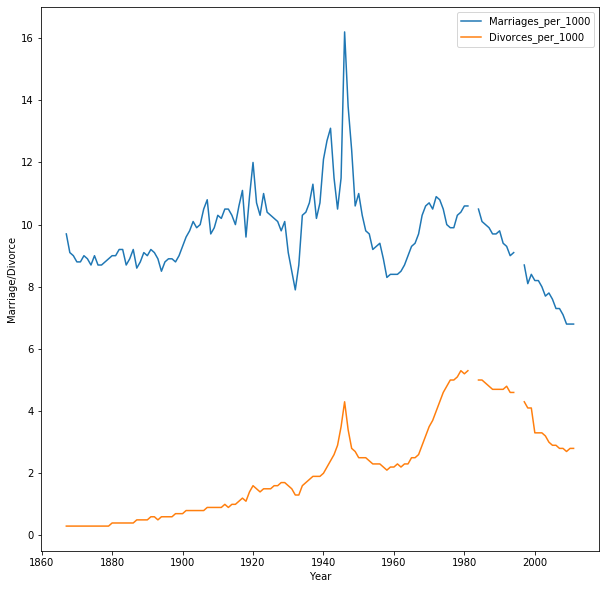

In [13]:
df_us.plot.line(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Marriage/Divorce")
plt.show()

# Question 7

Text(0.5, 1.0, 'US Marriages & Divorces Data')

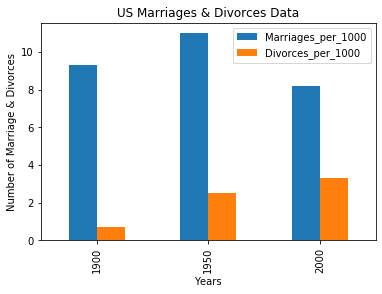

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

us_marriage = pd.read_csv(r'C:\Desktop\Data_prog\Problem_Set3\us-marriages-divorces-1867-2014.csv')
us_wed1 = us_marriage[(us_marriage.Year == 1900) | (us_marriage.Year == 1950) | (us_marriage.Year == 2000)]
us_wed1 = us_wed1.drop(columns = ['Marriages', 'Divorces', 'Population'])
us_wed1 = us_wed1.set_index('Year')

us_wed1.plot.bar()

plt.xlabel('Years')
plt.ylabel('Number of Marriage & Divorces')
plt.title('US Marriages & Divorces Data')



# Question 8

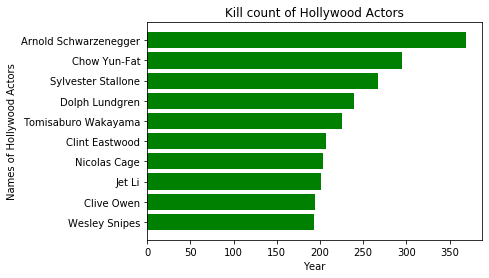

In [74]:
Actor_file = pd.read_csv(r'C:\Desktop\Data_prog\Problem_Set3\actor_kill_counts.csv')
H_actor = Actor_file.sort_values(by="Count")


plt.barh(H_actor['Actor'], H_actor['Count'],  color='green')
plt.title('Kill count of Hollywood Actors')

plt.xlabel('Year')
plt.ylabel('Names of Hollywood Actors')


plt.show()

# Question: 10

Text(0.5, 1.0, 'Relationship between the revenue and the Doctorates awarded in the U.S.')

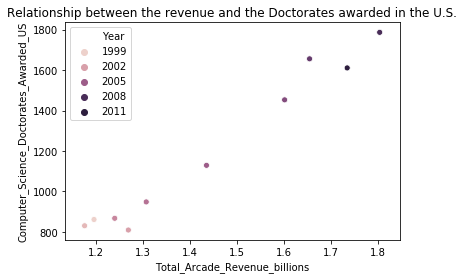

In [94]:
import seaborn as sb
earned_Money = pd.read_csv(r'C:\Desktop\Data_prog\Problem_Set3\arcade-revenue-vs-cs-doctorates.csv')

earned_Money = earned_Money.rename(columns={'Total Revenue': 'Total_Arcade_Revenue_billions', 'CS Doctorates Awarded': 'Computer_Science_Doctorates_Awarded_US'})

axis = sb.scatterplot(x='Total_Arcade_Revenue_billions', y='Computer_Science_Doctorates_Awarded_US', hue="Year", data=earned_Money)
axis.set_title('Relationship between the revenue and the Doctorates awarded in the U.S.')